# Data Science Project: Strength of Hadith Classifier

Maryam Aqel 4111815

Waad Alhejali 4110091


## Import necessary Libraries

In [7]:
pip install WordCloud

In [8]:
pip install arabic_reshaper

In [9]:
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from keras.layers import Embedding, LSTM, Dense
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from PIL import ImageDraw
from PIL import ImageFont
import arabic_reshaper
import seaborn as sns
from PIL import Image
import pandas as pd
import numpy as np
import requests
import string
import re

We are using Beautiful Soup for this Assignment to web scrap Data!

Web Scraping Method Takes Desired URL and pattern "Structure of data"

In [ ]:
titles = []

def get_url(url, pattern):
    response = requests.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.text, 'html.parser')

        # Find the HTML elements that match the pattern
        elements = soup.select(pattern)

        # Extract and append the content of the matching elements to the list
        if elements:
            for element in elements:
                title_text = element.text.strip()
                titles.append(title_text)
                print(title_text)
        else:
            print('No matching elements found. Check the CSS selector.')
    else:
        print('Failed to retrieve the web page. Status code:', response.status_code)

In [ ]:
#For Example
get_url('https://dorar.net/hadith/search?q=&st=w&xclude=&rawi%5B%5D=','span.primary-text-color')

بعض أصحاب محمد
الألباني
ضعيف أبي داود
1428
ضعيف
مصدقا رسول الله
الألباني
ضعيف أبي داود
1581
ضعيف
أبو حمزة الثمالي
ابن حجر العسقلاني
العجاب في بيان الأسباب
2/889
إسناده ضعيف
عبدالله بن عتبة
ابن تيمية
الصارم المسلول
3/605
إسناده صحيح
عامر بن ربيعة
ابن حجر العسقلاني
تسديد القوس
1/348
أسنده البزار وفي مسنده محمد بن عبد الرحمن القشيري، وهو ضعيف
إسناده ضعيف
أنس بن مالك
ابن حجر العسقلاني
تغليق التعليق
5/25
إسناده صحيح
عبدالله بن عمر
الألباني
التعليقات الرضية
52/3
على ضعفه قد اضطرب في إسناده
إسناده لا يصح
جابر بن عبدالله
ابن حزم
الإحكام في أصول الأحكام
2/251
موضوع
عبدالله بن عباس
أحمد شاكر
تخريج سنن الترمذي
1/279
صحيح
عبدالله بن عباس
ابن الملقن
الإعلام بفوائد عمدة الأحكام
7/110
إسناده صحيح
الأسود بن يزيد
ابن تيمية
شرح العمدة (المناسك)
2/614
إسناده صحيح
جابر بن عبدالله
الألباني
التعليقات الرضية
534/2
صحيح
[جد عمرو بن شعيب]
ابن حجر العسقلاني
تغليق التعليق
3/465
ضعيف مضطرب
عبدالله بن عباس
ابن تيمية
الصارم المسلول
2/48
إسناده صحيح
أم سلمة أم المؤمنين
الألباني
التعليقات الرضية
508/2
لا يصح
عبدالله 

In [ ]:
print(len(titles))

0


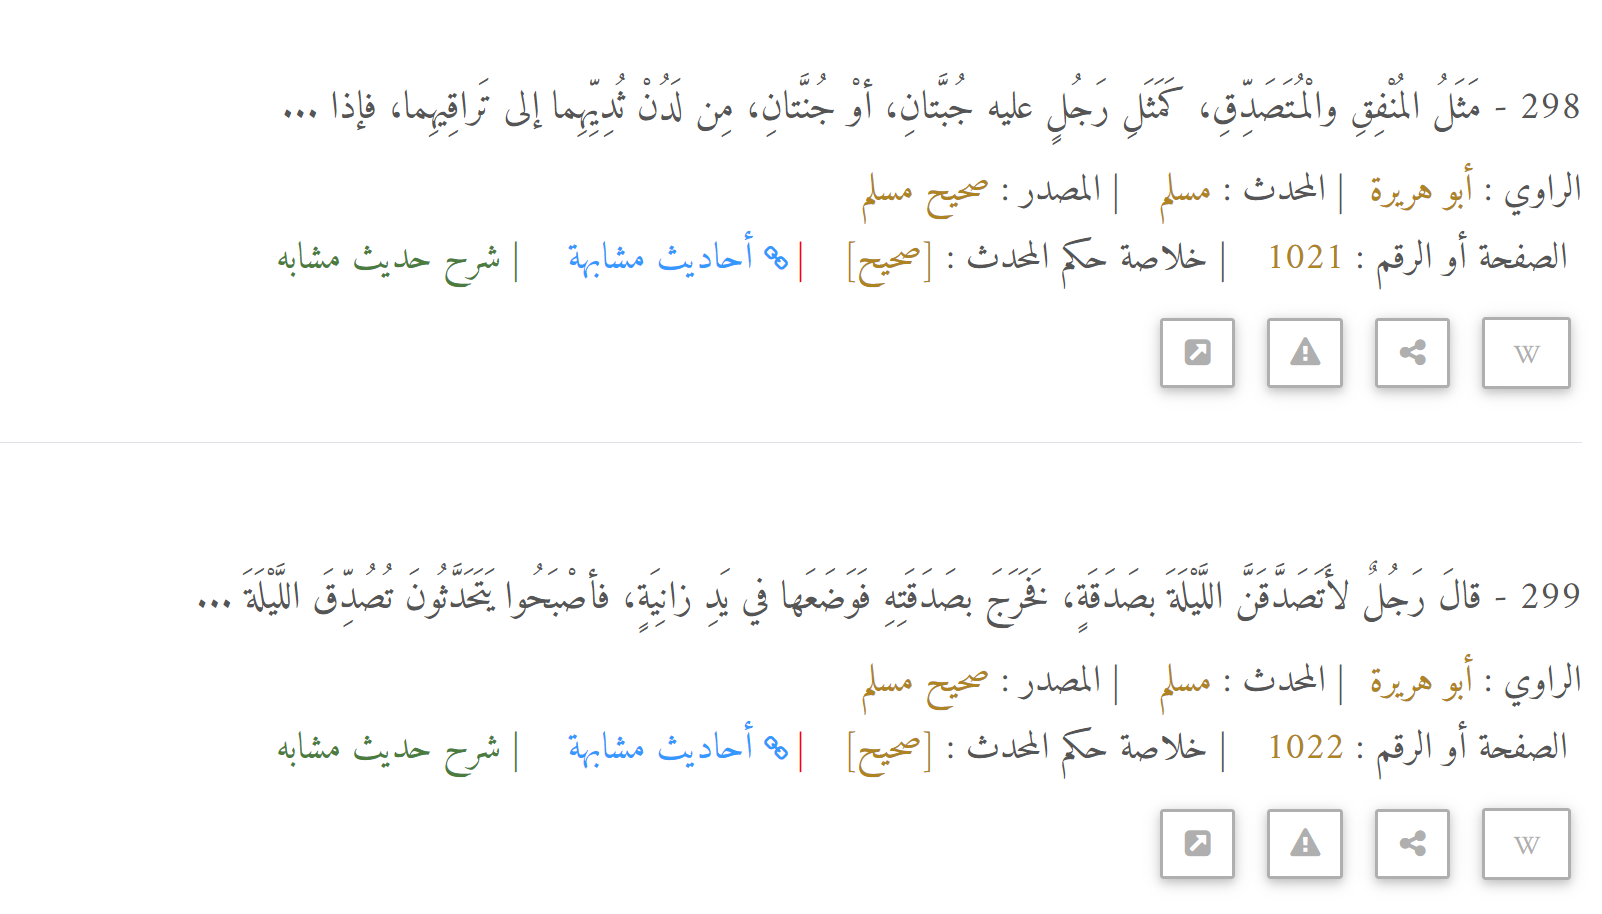

Website :
https://dorar.net/hadith/search?q=&st=w&xclude=&rawi%5B%5D=&page=10#home

Experimenting to Web Scrap for 10 consecutive Pages!

In [ ]:
base_url = 'https://dorar.net/hadith/search?q=&st=w&xclude=&rawi%5B%5D='
pattern = 'span.primary-text-color'
num_pages = 10  # Replace with the actual number of pages

for page_num in range(1, num_pages + 1):
    url = f"{base_url}&page={page_num}#home"
    get_url(url, pattern)


بعض أصحاب محمد
الألباني
ضعيف أبي داود
1428
ضعيف
مصدقا رسول الله
الألباني
ضعيف أبي داود
1581
ضعيف
أبو حمزة الثمالي
ابن حجر العسقلاني
العجاب في بيان الأسباب
2/889
إسناده ضعيف
عبدالله بن عتبة
ابن تيمية
الصارم المسلول
3/605
إسناده صحيح
عامر بن ربيعة
ابن حجر العسقلاني
تسديد القوس
1/348
أسنده البزار وفي مسنده محمد بن عبد الرحمن القشيري، وهو ضعيف
إسناده ضعيف
أنس بن مالك
ابن حجر العسقلاني
تغليق التعليق
5/25
إسناده صحيح
عبدالله بن عمر
الألباني
التعليقات الرضية
52/3
على ضعفه قد اضطرب في إسناده
إسناده لا يصح
جابر بن عبدالله
ابن حزم
الإحكام في أصول الأحكام
2/251
موضوع
عبدالله بن عباس
أحمد شاكر
تخريج سنن الترمذي
1/279
صحيح
عبدالله بن عباس
ابن الملقن
الإعلام بفوائد عمدة الأحكام
7/110
إسناده صحيح
الأسود بن يزيد
ابن تيمية
شرح العمدة (المناسك)
2/614
إسناده صحيح
جابر بن عبدالله
الألباني
التعليقات الرضية
534/2
صحيح
[جد عمرو بن شعيب]
ابن حجر العسقلاني
تغليق التعليق
3/465
ضعيف مضطرب
عبدالله بن عباس
ابن تيمية
الصارم المسلول
2/48
إسناده صحيح
أم سلمة أم المؤمنين
الألباني
التعليقات الرضية
508/2
لا يصح
عبدالله 

Features to Dataframe

In [ ]:
#Lists To Store All our Features by web scraping!
narrators=[]
sources=[]
muhaddiths=[]
hadiths=[]

Web scraping our first dataframe from "Home" section

In [ ]:
base_url = 'https://dorar.net/hadith/search?q=&st=w&xclude=&rawi%5B%5D='
section_id = 'home'  #Section Selection because we have multiple
num_pages = 10


for page_num in range(1, num_pages + 1):
    url = f"{base_url}&page={page_num}#{section_id}"
    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')

        # Find the container or unique element for the desired section
        section_container = soup.find('div', {'id': section_id})

        # Check if the section is found
        if section_container:
            # Extract data from the section
            hadith_elements = section_container.find_all('h5')

            for hadith_element in hadith_elements:
                # Extract the hadith text
                hadith_text = hadith_element.text.strip()
                hadiths.append(hadith_text)
                print('Hadith Text:', hadith_text)

                # Extract the narrator
                narrator_element = hadith_element.find_next('span', class_='primary-text-color')
                narrator = narrator_element.text.strip() if narrator_element else ''
                narrators.append(narrator)
                print('Narrator:', narrator)

                # Extract the muhaddith
                muhaddith_element = hadith_element.find_next('a', {'view-card': 'mhd'})
                muhaddith = muhaddith_element.span.text.strip() if muhaddith_element else ''
                muhaddiths.append(muhaddith)
                print('Muhaddith:', muhaddith)

                # Extract the source
                source_element = hadith_element.find_next('a', {'view-card': 'book'})
                source = source_element.span.text.strip() if source_element else ''
                sources.append(source)
                print('Source:', source)

                print('---')


Hadith Text: 1  - أنَّ أبيَّ بنَ كعبٍ أمَّهم - يَعني - في رمضانَ وَكانَ يقنُتُ في النِّصفِ الآخِرِ ...
Narrator: بعض أصحاب محمد
Muhaddith: الألباني
Source: ضعيف أبي داود
---
Hadith Text: 2  -  أنِّي [ يعني سعرَ بنَ ديسمٍ ] كنتُ في شِعْبٍ من هذه الشعابِ على عهدِ ...
Narrator: مصدقا رسول الله
Muhaddith: الألباني
Source: ضعيف أبي داود
---
Hadith Text: 3  -  عن أبي حمزةَ الثُّماليِّ قال : يعني بالنَّاسِ في هذه الآيةِ نبيُّ اللهِ صلَّى اللهُ ...
Narrator: أبو حمزة الثمالي
Muhaddith: ابن حجر العسقلاني
Source: العجاب في بيان الأسباب
---
Hadith Text: 4  -  أَخَذَ ابْنُ مسعودٍ قَوْمًا ارْتَدُّوا عَنِ الإسلامِ من أهلِ العراقِ ، قال : فَكتبَ فيهِمْ ...
Narrator: عبدالله بن عتبة
Muhaddith: ابن تيمية
Source: الصارم المسلول
---
Hadith Text: 5  -  إذا مات العبدُ واللهُ عزَّ وجلَّ يعلم منه شرًّا وقال الناسُ خيرًا إلا قال اللهُ ...
Narrator: عامر بن ربيعة
Muhaddith: ابن حجر العسقلاني
Source: تسديد القوس
---
Hadith Text: 6  - أنَّ أبا عبيدةَ بنَ الجرَّاحِ, ومعاذَ بنَ جبلٍ وأبا طلحةَ معهم كانوا يشربون با

  Web Scraping Data from the second section (Specialist)!

In [ ]:
base_url = 'https://dorar.net/hadith/search?q=&st=w&xclude=&rawi%5B%5D='
section_id = 'specialist'  #Section Selection because we have multiple
num_pages = 10


for page_num in range(1, num_pages + 1):
    url = f"{base_url}&page={page_num}#{section_id}"
    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')

        # Find the container or unique element for the desired section
        section_container = soup.find('div', {'id': section_id})

        # Check if the section is found
        if section_container:
            # Extract data from the section
            hadith_elements = section_container.find_all('h5')

            for hadith_element in hadith_elements:
                # Extract the hadith text
                hadith_text = hadith_element.text.strip()
                hadiths.append(hadith_text)
                #print('Hadith Text:', hadith_text)

                # Extract the narrator
                narrator_element = hadith_element.find_next('span', class_='primary-text-color')
                narrator = narrator_element.text.strip() if narrator_element else ''
                narrators.append(narrator)
                #print('Narrator:', narrator)

                # Extract the muhaddith
                muhaddith_element = hadith_element.find_next('a', {'view-card': 'mhd'})
                muhaddith = muhaddith_element.span.text.strip() if muhaddith_element else ''
                muhaddiths.append(muhaddith)
                #print('Muhaddith:', muhaddith)

                # Extract the source
                source_element = hadith_element.find_next('a', {'view-card': 'book'})
                source = source_element.span.text.strip() if source_element else ''
                sources.append(source)
                #print('Source:', source)

                #print('---')


In [ ]:
#Check Theyre the same size to concatenate into DataFrame
print(len(sources))
print(len(narrators))
print(len(muhaddiths))
print(len(hadiths))

300
300
300
300


In [ ]:
hadiths

['1  - أنَّ أبيَّ بنَ كعبٍ أمَّهم - يَعني - في رمضانَ وَكانَ يقنُتُ في النِّصفِ الآخِرِ ...',
 '2  -  أنِّي [ يعني سعرَ بنَ ديسمٍ ] كنتُ في شِعْبٍ من هذه الشعابِ على عهدِ ...',
 '3  -  عن أبي حمزةَ الثُّماليِّ قال : يعني بالنَّاسِ في هذه الآيةِ نبيُّ اللهِ صلَّى اللهُ ...',
 '4  -  أَخَذَ ابْنُ مسعودٍ قَوْمًا ارْتَدُّوا عَنِ الإسلامِ من أهلِ العراقِ ، قال : فَكتبَ فيهِمْ ...',
 '5  -  إذا مات العبدُ واللهُ عزَّ وجلَّ يعلم منه شرًّا وقال الناسُ خيرًا إلا قال اللهُ ...',
 '6  - أنَّ أبا عبيدةَ بنَ الجرَّاحِ, ومعاذَ بنَ جبلٍ وأبا طلحةَ معهم كانوا يشربون بالشام من ...',
 '7  -  إذا ذَبَحَ أحدُكم فلْيُجْهِزْ.',
 '8  -  أصحابي كالنُّجومِ بأيِّهم اقتديتُم اهتديتُم',
 '9  -  أمَّني جبريلُ [ عليهِ السلامُ ] عند البيتِ مرتين, فصلى الظهرَ في الأولى منهما حين ...',
 '10  -  إنَّ اللهَ إذا حرَّم على قومٍ أكلَ شيءٍ حرَّم عليهم ثمنَه',
 '11  - أنَّ رجلًا قدِمَ على عُمَرَ بنَ الخطَّابِ وهو بجمعٍ بعدما أفاض من عرفاتٍ فقال : ...',
 '12  -  أنَّ رجلًا منَ الأنصارِ أعطى أمَّهُ حديقةً من نخيلٍ حياتَها ، فم

# Data Preprocessing Methods to fit into model

In [ ]:
#Method to preprocess Hadiths and remove unnecessary prefix and suffix
def preprocess_hadith(hadith):
    # Remove numbering and hyphen, then strip leading/trailing spaces
    cleaned_hadith = re.sub(r'^\d+\s*-\s*', '', hadith).strip()
    # Remove commas
    cleaned_hadith = cleaned_hadith.replace(',', '')
    # Remove ellipsis
    cleaned_hadith = cleaned_hadith.replace('...', '')
    return cleaned_hadith

In [ ]:
# Apply the preprocessing function to each hadith
preprocessed_hadiths = [preprocess_hadith(hadith) for hadith in hadiths]

# Print the preprocessed hadiths
for i, hadith in enumerate(preprocessed_hadiths, start=1):
    print(hadith)

أنَّ أبيَّ بنَ كعبٍ أمَّهم - يَعني - في رمضانَ وَكانَ يقنُتُ في النِّصفِ الآخِرِ 
أنِّي [ يعني سعرَ بنَ ديسمٍ ] كنتُ في شِعْبٍ من هذه الشعابِ على عهدِ 
عن أبي حمزةَ الثُّماليِّ قال : يعني بالنَّاسِ في هذه الآيةِ نبيُّ اللهِ صلَّى اللهُ 
أَخَذَ ابْنُ مسعودٍ قَوْمًا ارْتَدُّوا عَنِ الإسلامِ من أهلِ العراقِ ، قال : فَكتبَ فيهِمْ 
إذا مات العبدُ واللهُ عزَّ وجلَّ يعلم منه شرًّا وقال الناسُ خيرًا إلا قال اللهُ 
أنَّ أبا عبيدةَ بنَ الجرَّاحِ ومعاذَ بنَ جبلٍ وأبا طلحةَ معهم كانوا يشربون بالشام من 
إذا ذَبَحَ أحدُكم فلْيُجْهِزْ.
أصحابي كالنُّجومِ بأيِّهم اقتديتُم اهتديتُم
أمَّني جبريلُ [ عليهِ السلامُ ] عند البيتِ مرتين فصلى الظهرَ في الأولى منهما حين 
إنَّ اللهَ إذا حرَّم على قومٍ أكلَ شيءٍ حرَّم عليهم ثمنَه
أنَّ رجلًا قدِمَ على عُمَرَ بنَ الخطَّابِ وهو بجمعٍ بعدما أفاض من عرفاتٍ فقال : 
أنَّ رجلًا منَ الأنصارِ أعطى أمَّهُ حديقةً من نخيلٍ حياتَها ، فماتت ، فجاءَ إخوتُهُ 
أنَّ رسولَ اللهِ صلَّى اللهُ عليهِ وسلَّم وأبا بَكرٍ وعُمرَ حرَّقوا مَتاعَ الغالِّ وضرَبوه
أنَّ رسولَ اللهِ صلَّى اللهُ علَ

In [ ]:
#Method to remove all non arabic letters from hadiths wether its the numbering, punctuations, brackets
def punctuation_remover(hadith):
 # Remove punctuation and symbols
    translator = str.maketrans("", "", string.punctuation + string.digits)
    hadith = hadith.translate(translator)

    # Remove non-Arabic letters
    hadith = ''.join(char for char in hadith if char.isalpha() or char.isspace())  # Keep Arabic letters and spaces
    #remove wrong double spaces into one
    hadith = re.sub(r'\s+', ' ', hadith)

    return hadith.upper()

In [ ]:
#Method that removes arabic harakat such as ُ ً ْ ٍ ِ َ
def harakat_remover(text):
    reshaped_text = arabic_reshaper.reshape(text)
    harakat_pattern = re.compile(r'[\u064b-\u0652]+')
    text_without_harakat = re.sub(harakat_pattern, '', reshaped_text)
    return text_without_harakat

In [ ]:
for hadith in hadiths:
    remove_punctutaion = punctuation_remover(hadith)
    harakat_removed_hadith = harakat_remover(remove_punctutaion)
    #hadith_normalized_whitespace = re.sub(r'\s+', ' ', harakat_removed_hadith)
    print(harakat_removed_hadith)

 ﺃﻥ ﺃﺑﻲ ﺑﻦ ﻛﻌﺐ ﺃﻣﻬﻢ ﻳﻌﻨﻲ ﻓﻲ ﺭﻣﻀﺎﻥ ﻭﻛﺎﻥ ﻳﻘﻨﺖ ﻓﻲ ﺍﻟﻨﺼﻒ ﺍﻵﺧﺮ 
 ﺃﻧﻲ ﻳﻌﻨﻲ ﺳﻌﺮ ﺑﻦ ﺩﻳﺴﻢ ﻛﻨﺖ ﻓﻲ ﺷﻌﺐ ﻣﻦ ﻫﺬﻩ ﺍﻟﺸﻌﺎﺏ ﻋﻠﻰ ﻋﻬﺪ 
 ﻋﻦ ﺃﺑﻲ ﺣﻤﺰﺓ ﺍﻟﺜﻤﺎﻟﻲ ﻗﺎﻝ ﻳﻌﻨﻲ ﺑﺎﻟﻨﺎﺱ ﻓﻲ ﻫﺬﻩ ﺍﻵﻳﺔ ﻧﺒﻲ ﷲ ﺻﻠﻰ ﷲ 
 ﺃﺧﺬ ﺍﺑﻦ ﻣﺴﻌﻮﺩ ﻗﻮﻣﺎ ﺍﺭﺗﺪﻭﺍ ﻋﻦ ﺍﻹﺳﻼﻡ ﻣﻦ ﺃﻫﻞ ﺍﻟﻌﺮﺍﻕ ﻗﺎﻝ ﻓﻜﺘﺐ ﻓﻴﻬﻢ 
 ﺇﺫﺍ ﻣﺎﺕ ﺍﻟﻌﺒﺪ ﻭﷲ ﻋﺰ ﻭﺟﻞ ﻳﻌﻠﻢ ﻣﻨﻪ ﺷﺮﺍ ﻭﻗﺎﻝ ﺍﻟﻨﺎﺱ ﺧﻴﺮﺍ ﺇﻻ ﻗﺎﻝ ﷲ 
 ﺃﻥ ﺃﺑﺎ ﻋﺒﻴﺪﺓ ﺑﻦ ﺍﻟﺠﺮﺍﺡ ﻭﻣﻌﺎﺫ ﺑﻦ ﺟﺒﻞ ﻭﺃﺑﺎ ﻃﻠﺤﺔ ﻣﻌﻬﻢ ﻛﺎﻧﻮﺍ ﻳﺸﺮﺑﻮﻥ ﺑﺎﻟﺸﺎﻡ ﻣﻦ 
 ﺇﺫﺍ ﺫﺑﺢ ﺃﺣﺪﻛﻢ ﻓﻠﻴﺠﻬﺰ
 ﺃﺻﺤﺎﺑﻲ ﻛﺎﻟﻨﺠﻮﻡ ﺑﺄﻳﻬﻢ ﺍﻗﺘﺪﻳﺘﻢ ﺍﻫﺘﺪﻳﺘﻢ
 ﺃﻣﻨﻲ ﺟﺒﺮﻳﻞ ﻋﻠﻴﻪ ﺍﻟﺴﻼﻡ ﻋﻨﺪ ﺍﻟﺒﻴﺖ ﻣﺮﺗﻴﻦ ﻓﺼﻠﻰ ﺍﻟﻈﻬﺮ ﻓﻲ ﺍﻷﻭﻟﻰ ﻣﻨﻬﻤﺎ ﺣﻴﻦ 
 ﺇﻥ ﷲ ﺇﺫﺍ ﺣﺮﻡ ﻋﻠﻰ ﻗﻮﻡ ﺃﻛﻞ ﺷﻲﺀ ﺣﺮﻡ ﻋﻠﻴﻬﻢ ﺛﻤﻨﻪ
 ﺃﻥ ﺭﺟﻼ ﻗﺪﻡ ﻋﻠﻰ ﻋﻤﺮ ﺑﻦ ﺍﻟﺨﻄﺎﺏ ﻭﻫﻮ ﺑﺠﻤﻊ ﺑﻌﺪﻣﺎ ﺃﻓﺎﺽ ﻣﻦ ﻋﺮﻓﺎﺕ ﻓﻘﺎﻝ 
 ﺃﻥ ﺭﺟﻼ ﻣﻦ ﺍﻷﻧﺼﺎﺭ ﺃﻋﻄﻰ ﺃﻣﻪ ﺣﺪﻳﻘﺔ ﻣﻦ ﻧﺨﻴﻞ ﺣﻴﺎﺗﻬﺎ ﻓﻤﺎﺗﺖ ﻓﺠﺎﺀ ﺇﺧﻮﺗﻪ 
 ﺃﻥ ﺭﺳﻮﻝ ﷲ ﺻﻠﻰ ﷲ ﻋﻠﻴﻪ ﻭﺳﻠﻢ ﻭﺃﺑﺎ ﺑﻜﺮ ﻭﻋﻤﺮ ﺣﺮﻗﻮﺍ ﻣﺘﺎﻉ ﺍﻟﻐﺎﻝ ﻭﺿﺮﺑﻮﻩ
 ﺃﻥ ﺭﺳﻮﻝ ﷲ ﺻﻠﻰ ﷲ ﻋﻠﻴﻪ ﻭﺳﻠﻢ ﻛﺎﻥ ﻓﻲ ﻇﻞ ﺣﺠﺮﺓ ﻣﻦ ﺣﺠﺮﻩ ﻭﻋﻨﺪﻩ ﻧﻔﺮ 
 ﺇﺫﺍ ﻛﺎﻥ ﻹﺣﺪﺍﻛﻦ ﻣﻜﺎﺗﺐ ﻭﻛﺎﻥ ﻋﻨﺪﻩ ﻣﺎ ﻳﺆﺩﻱ ﻓﻠﺘﺤﺘﺠﺐ ﻣﻨﻪ
 ﺗﻨﻘﻞ ﺭﺳﻮﻝ ﷲ ﺻﻠﻰ ﷲ ﻋﻠﻴﻪ ﻭﺳﻠﻢ ﺳﻴﻔﻪ ﺫﺍ ﺍﻟﻔﻘﺎﺭ ﻳﻮﻡ ﺑﺪﺭ ﻗﺎﻝ ﺍﺑﻦ ﻋﺒﺎﺱ 
 ﺛﻼﺙ ﻻ ﻳﺆﺧﺮﻥ ﺍﻟﺼﻼﺓ ﺇﺫﺍ ﺃﺗﺖ ﻭﺍﻟﺠﻨﺎﺯﺓ ﺇﺫﺍ ﺣﻀﺮﺕ ﻭﺍﻷﻳﻢ ﺇﺫﺍ ﻭﺟﺪﺕ ﻟﻬﺎ ﻛﻔﺆﺍ

Challenge to extract Page number Feature (Even though we will not need it in the future)

In [ ]:
page_numbers=[]
base_url = 'https://dorar.net/hadith/search?q=&st=w&xclude=&rawi%5B%5D='
section_id = 'home'  # Replace with the actual ID of the section you want to scrape
num_pages = 10

for page_num in range(1, num_pages + 1):
    url = f"{base_url}&page={page_num}#{section_id}"
    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')

        # Find the container or unique element for the desired section
        section_container = soup.find('div', {'id': section_id})

        # Check if the section is found
        if section_container:
          strong_elements = soup.find_all('strong')

          for strong_element in strong_elements:
        # Check if the target string is present in the strong element
            if 'الصفحة أو الرقم :' in strong_element.get_text():
            # Extract the corresponding span element with the page number
              span_element = strong_element.find_next('span', class_='primary-text-color')
              if span_element:
                page_number = span_element.text.strip()
                #print('Page Number is', page_number)
                page_numbers.append(page_number)

              else:
                print('Page Number not found for the current entry.')

In [ ]:
# Print the first 300 elements with numbering
for i, page_number in enumerate(page_numbers[:300]):
    print(f'{i}: {page_number}')


0: 1428
1: 1581
2: 2/889
3: 3/605
4: 1/348
5: 5/25
6: 52/3
7: 2/251
8: 1/279
9: 7/110
10: 2/614
11: 534/2
12: 3/465
13: 2/48
14: 508/2
15: 5/331
16: 142/2
17: 438/3
18: 1/242
19: 24/3
20: 1/247
21: 459/2
22: 2/77
23: 173/2
24: 10/198
25: 1/484
26: 177/2
27: 1/198
28: 459/2
29: 1/261
30: 4/332
31: 238/2
32: 1/532
33: 1428
34: 1581
35: 2/889
36: 3/605
37: 1/348
38: 1/44
39: 5/25
40: 52/3
41: 2/76
42: 2/193
43: 468/3
44: 2/251
45: 5/72
46: 1/279
47: 1/267
48: 1/287
49: 7/110
50: 3/1079
51: 3/1099
52: 342/3
53: 2/614
54: 534/2
55: 177/2
56: 3/465
57: 2/48
58: 1/428
59: 2/228
60: 130/3
61: 2/170
62: 1/203
63: 1784
64: 2065
65: 2233
66: 2/96
67: 2/125
68: 3/280
69: 143/2
70: 423/1
71: 2/101
72: 166/3
73: 11/3
74: 237/2
75: 145/2
76: 251/3
77: 4/458
78: 284/3
79: 2/432
80: 1/91
81: 4/244
82: 1/269
83: 163/2
84: 431/2
85: 2/443
86: 424/1
87: 2/716
88: 2/300
89: 5/259
90: 4/332
91: 238/2
92: 1/532
93: 1428
94: 1581
95: 2/889
96: 3/605
97: 1/348
98: 1/44
99: 5/25
100: 52/3
101: 2/76
102: 2/193
1

In [ ]:
# Initialize an empty list to store all slices
page_numbers1 = []

slice_size = 30
total_elements = 300

# Generate slices until you reach the total number of elements
for start_index in range(0, total_elements, slice_size):
    end_index = start_index + slice_size
    current_slice = page_numbers[start_index:end_index]
    page_numbers1.extend(current_slice)

# Print or use the combined slices as needed
print("Page number list:", page_numbers1)


Page number list: ['1428', '1581', '2/889', '3/605', '1/348', '5/25', '52/3', '2/251', '1/279', '7/110', '2/614', '534/2', '3/465', '2/48', '508/2', '5/331', '142/2', '438/3', '1/242', '24/3', '1/247', '459/2', '2/77', '173/2', '10/198', '1/484', '177/2', '1/198', '459/2', '1/261', '4/332', '238/2', '1/532', '1428', '1581', '2/889', '3/605', '1/348', '1/44', '5/25', '52/3', '2/76', '2/193', '468/3', '2/251', '5/72', '1/279', '1/267', '1/287', '7/110', '3/1079', '3/1099', '342/3', '2/614', '534/2', '177/2', '3/465', '2/48', '1/428', '2/228', '130/3', '2/170', '1/203', '1784', '2065', '2233', '2/96', '2/125', '3/280', '143/2', '423/1', '2/101', '166/3', '11/3', '237/2', '145/2', '251/3', '4/458', '284/3', '2/432', '1/91', '4/244', '1/269', '163/2', '431/2', '2/443', '424/1', '2/716', '2/300', '5/259', '4/332', '238/2', '1/532', '1428', '1581', '2/889', '3/605', '1/348', '1/44', '5/25', '52/3', '2/76', '2/193', '468/3', '2/251', '5/72', '1/279', '1/267', '1/287', '7/110', '3/1079', '3/109

In [ ]:
len(preprocessed_hadiths)

300

In [ ]:
df = pd.DataFrame({
    'Hadith': preprocessed_hadiths,
    'Narrator': narrators,
    'Source': sources,
    'Speaker': muhaddiths,
    'Page Number': page_numbers1
})

In [ ]:
df

,Hadith,Narrator,Source,Speaker,Page Number
0,أنَّ أبيَّ بنَ كعبٍ أمَّهم - يَعني - في رمضانَ...,بعض أصحاب محمد,ضعيف أبي داود,الألباني,1428
1,أنِّي [ يعني سعرَ بنَ ديسمٍ ] كنتُ في شِعْبٍ م...,مصدقا رسول الله,ضعيف أبي داود,الألباني,1581
2,عن أبي حمزةَ الثُّماليِّ قال : يعني بالنَّاسِ ...,أبو حمزة الثمالي,العجاب في بيان الأسباب,ابن حجر العسقلاني,2/889
3,أَخَذَ ابْنُ مسعودٍ قَوْمًا ارْتَدُّوا عَنِ ال...,عبدالله بن عتبة,الصارم المسلول,ابن تيمية,3/605
4,إذا مات العبدُ واللهُ عزَّ وجلَّ يعلم منه شرًّ...,عامر بن ربيعة,تسديد القوس,ابن حجر العسقلاني,1/348
...,...,...,...,...,...
295,مَثَلُ البَخِيلِ والْمُتَصَدِّقِ مَثَلُ رَجُلَ...,أبو هريرة,صحيح مسلم,مسلم,177/2
296,ضَرَبَ رَسولُ اللهِ صَلَّى اللَّهُ عليه وسلَّم...,أبو هريرة,صحيح مسلم,مسلم,3/465
297,مَثَلُ المُنْفِقِ والْمُتَصَدِّقِ، كَمَثَلِ رَ...,أبو هريرة,صحيح مسلم,مسلم,2/48
298,قالَ رَجُلٌ لأَتَصَدَّقَنَّ اللَّيْلَةَ بصَدَق...,أبو هريرة,صحيح مسلم,مسلم,1/428


In [ ]:
df.to_excel('data1.xlsx',index=False)

#Annotation ! :Preparing Our Dataset

In [ ]:
#Manually added annotations labels
df1 = pd.read_excel('/content/data1.xlsx')

In [ ]:
df1.to_csv('/content/data1.csv', index=False)

In [ ]:
df1

,Hadith,Narrator,Source,Speaker,Page Number,Labels
0,أنَّ أبيَّ بنَ كعبٍ أمَّهم - يَعني - في رمضانَ...,بعض أصحاب محمد,ضعيف أبي داود,الألباني,1428,ضعيف
1,أنِّي [ يعني سعرَ بنَ ديسمٍ ] كنتُ في شِعْبٍ م...,مصدقا رسول الله,ضعيف أبي داود,الألباني,1581,ضعيف
2,عن أبي حمزةَ الثُّماليِّ قال : يعني بالنَّاسِ ...,أبو حمزة الثمالي,العجاب في بيان الأسباب,ابن حجر العسقلاني,2/889,إسناده ضعيف
3,أَخَذَ ابْنُ مسعودٍ قَوْمًا ارْتَدُّوا عَنِ ال...,عبدالله بن عتبة,الصارم المسلول,ابن تيمية,3/605,إسناده صحيح
4,إذا مات العبدُ واللهُ عزَّ وجلَّ يعلم منه شرًّ...,عامر بن ربيعة,تسديد القوس,ابن حجر العسقلاني,1/348,إسناده ضعيف
...,...,...,...,...,...,...
295,مَثَلُ البَخِيلِ والْمُتَصَدِّقِ مَثَلُ رَجُلَ...,أبو هريرة,صحيح مسلم,مسلم,177/2,صحيح
296,ضَرَبَ رَسولُ اللهِ صَلَّى اللَّهُ عليه وسلَّم...,أبو هريرة,صحيح مسلم,مسلم,3/465,صحيح
297,مَثَلُ المُنْفِقِ والْمُتَصَدِّقِ، كَمَثَلِ رَ...,أبو هريرة,صحيح مسلم,مسلم,2/48,صحيح
298,قالَ رَجُلٌ لأَتَصَدَّقَنَّ اللَّيْلَةَ بصَدَق...,أبو هريرة,صحيح مسلم,مسلم,1/428,صحيح


In [ ]:
#we have two sperated datasets due to having two sections we scraped from
df2 = pd.read_excel('/content/data2.xlsx')
df2

,Hadith,Narrator,Speaker,Source,Labels
0,1 - أنَّ أبيَّ بنَ كعبٍ أمَّهم - يَعني - في ر...,بعض أصحاب محمد,الألباني,ضعيف أبي داود,ضعيف
1,2 - أنِّي [ يعني سعرَ بنَ ديسمٍ ] كنتُ في شِ...,مصدقا رسول الله,الألباني,ضعيف أبي داود,ضعيف
2,3 - عن أبي حمزةَ الثُّماليِّ قال : يعني بالن...,أبو حمزة الثمالي,ابن حجر العسقلاني,العجاب في بيان الأسباب,إسناده ضعيف
3,4 - أَخَذَ ابْنُ مسعودٍ قَوْمًا ارْتَدُّوا ع...,عبدالله بن عتبة,ابن تيمية,الصارم المسلول,إسناده صحيح
4,5 - إذا مات العبدُ واللهُ عزَّ وجلَّ يعلم من...,عامر بن ربيعة,ابن حجر العسقلاني,تسديد القوس,ضعيف
...,...,...,...,...,...
325,أنَّ النَّبيَّ صلَّى اللَّهُ عليهِ وآله وسلَّ...,عبدالله بن عمر,الشوكاني,الفوائد المجموعة,في إسناده كذاب
326,أوَّلُ حُبٍّ في الإسلامِ، حُبُّ النَّبيِّ صلّ...,أنس بن مالك,الشوكاني,الفوائد المجموعة,في إسناده كذابان
327,خيرُ أمَّتيَ الَّذي إذا أساءوا استغفَروا ، وإ...,جابر بن عبدالله,ابن حجر العسقلاني,بلوغ المرام,إسناده ضعيف
328,لا تُسكنُوهنَّ الغرفَ، ولا تعلِّموهنَّ الكتاب...,عائشة أم المؤمنين,الشوكاني,الفوائد المجموعة,في إسناده محمد بن إبراهيم الشامي كان يضع الحديث


In [ ]:
df2.to_csv('/content/data2.csv', index=False)


In [ ]:
#removing first 30 Duplicates
df2=df2[30:]
df2

,Hadith,Narrator,Speaker,Source,Labels
30,{ كُلَّ يَوْمٍ هُوَ فِي شَأْنٍ} قال : مِن شأن...,أبو الدرداء,ابن حجر العسقلاني,تغليق التعليق,فيه اضطراب وله شاهد بإسناد ضعيف
31,أبغضُ الحلالِ إلى اللهِ الطَّلاقُ,عبدالله بن عمر,الألباني,التعليقات الرضية,صحيح
32,أبو بكرٍ الصِّدِّيقُ تاجُ الإسلامِ وعُمرُ بنِ...,عبدالله بن مسعود,ابن حجر العسقلاني,تسديد القوس,صحيح
33,أنَّ أبيَّ بنَ كعبٍ أمَّهم - يَعني - في رمضان...,بعض أصحاب محمد,الألباني,ضعيف أبي داود,ضعيف
34,أنِّي [ يعني سعرَ بنَ ديسمٍ ] كنتُ في شِعْبٍ ...,مصدقا رسول الله,الألباني,ضعيف أبي داود,ضعيف
...,...,...,...,...,...
325,أنَّ النَّبيَّ صلَّى اللَّهُ عليهِ وآله وسلَّ...,عبدالله بن عمر,الشوكاني,الفوائد المجموعة,في إسناده كذاب
326,أوَّلُ حُبٍّ في الإسلامِ، حُبُّ النَّبيِّ صلّ...,أنس بن مالك,الشوكاني,الفوائد المجموعة,في إسناده كذابان
327,خيرُ أمَّتيَ الَّذي إذا أساءوا استغفَروا ، وإ...,جابر بن عبدالله,ابن حجر العسقلاني,بلوغ المرام,إسناده ضعيف
328,لا تُسكنُوهنَّ الغرفَ، ولا تعلِّموهنَّ الكتاب...,عائشة أم المؤمنين,الشوكاني,الفوائد المجموعة,في إسناده محمد بن إبراهيم الشامي كان يضع الحديث


In [ ]:
#Aquiring FullDataset
df_og=pd.concat([df1, df2], ignore_index=True)
df_og

,Hadith,Narrator,Source,Speaker,Page Number,Labels
0,أنَّ أبيَّ بنَ كعبٍ أمَّهم - يَعني - في رمضانَ...,بعض أصحاب محمد,ضعيف أبي داود,الألباني,1428,ضعيف
1,أنِّي [ يعني سعرَ بنَ ديسمٍ ] كنتُ في شِعْبٍ م...,مصدقا رسول الله,ضعيف أبي داود,الألباني,1581,ضعيف
2,عن أبي حمزةَ الثُّماليِّ قال : يعني بالنَّاسِ ...,أبو حمزة الثمالي,العجاب في بيان الأسباب,ابن حجر العسقلاني,2/889,إسناده ضعيف
3,أَخَذَ ابْنُ مسعودٍ قَوْمًا ارْتَدُّوا عَنِ ال...,عبدالله بن عتبة,الصارم المسلول,ابن تيمية,3/605,إسناده صحيح
4,إذا مات العبدُ واللهُ عزَّ وجلَّ يعلم منه شرًّ...,عامر بن ربيعة,تسديد القوس,ابن حجر العسقلاني,1/348,إسناده ضعيف
...,...,...,...,...,...,...
595,أنَّ النَّبيَّ صلَّى اللَّهُ عليهِ وآله وسلَّ...,عبدالله بن عمر,الفوائد المجموعة,الشوكاني,NaN,في إسناده كذاب
596,أوَّلُ حُبٍّ في الإسلامِ، حُبُّ النَّبيِّ صلّ...,أنس بن مالك,الفوائد المجموعة,الشوكاني,NaN,في إسناده كذابان
597,خيرُ أمَّتيَ الَّذي إذا أساءوا استغفَروا ، وإ...,جابر بن عبدالله,بلوغ المرام,ابن حجر العسقلاني,NaN,إسناده ضعيف
598,لا تُسكنُوهنَّ الغرفَ، ولا تعلِّموهنَّ الكتاب...,عائشة أم المؤمنين,الفوائد المجموعة,الشوكاني,NaN,في إسناده محمد بن إبراهيم الشامي كان يضع الحديث


In [ ]:
#Dropping the Feature we Don't actually need
df_og=df_og.drop('Page Number',axis=1)


In [ ]:
df_og

,Hadith,Narrator,Source,Speaker,Labels
0,أنَّ أبيَّ بنَ كعبٍ أمَّهم - يَعني - في رمضانَ...,بعض أصحاب محمد,ضعيف أبي داود,الألباني,ضعيف
1,أنِّي [ يعني سعرَ بنَ ديسمٍ ] كنتُ في شِعْبٍ م...,مصدقا رسول الله,ضعيف أبي داود,الألباني,ضعيف
2,عن أبي حمزةَ الثُّماليِّ قال : يعني بالنَّاسِ ...,أبو حمزة الثمالي,العجاب في بيان الأسباب,ابن حجر العسقلاني,إسناده ضعيف
3,أَخَذَ ابْنُ مسعودٍ قَوْمًا ارْتَدُّوا عَنِ ال...,عبدالله بن عتبة,الصارم المسلول,ابن تيمية,إسناده صحيح
4,إذا مات العبدُ واللهُ عزَّ وجلَّ يعلم منه شرًّ...,عامر بن ربيعة,تسديد القوس,ابن حجر العسقلاني,إسناده ضعيف
...,...,...,...,...,...
595,أنَّ النَّبيَّ صلَّى اللَّهُ عليهِ وآله وسلَّ...,عبدالله بن عمر,الفوائد المجموعة,الشوكاني,في إسناده كذاب
596,أوَّلُ حُبٍّ في الإسلامِ، حُبُّ النَّبيِّ صلّ...,أنس بن مالك,الفوائد المجموعة,الشوكاني,في إسناده كذابان
597,خيرُ أمَّتيَ الَّذي إذا أساءوا استغفَروا ، وإ...,جابر بن عبدالله,بلوغ المرام,ابن حجر العسقلاني,إسناده ضعيف
598,لا تُسكنُوهنَّ الغرفَ، ولا تعلِّموهنَّ الكتاب...,عائشة أم المؤمنين,الفوائد المجموعة,الشوكاني,في إسناده محمد بن إبراهيم الشامي كان يضع الحديث


In [ ]:
#Removing any white spaces and tails
df_og['Labels']=df_og['Labels'].str.strip()


In [ ]:
df_og

,Hadith,Narrator,Source,Speaker,Labels
0,أنَّ أبيَّ بنَ كعبٍ أمَّهم - يَعني - في رمضانَ...,بعض أصحاب محمد,ضعيف أبي داود,الألباني,ضعيف
1,أنِّي [ يعني سعرَ بنَ ديسمٍ ] كنتُ في شِعْبٍ م...,مصدقا رسول الله,ضعيف أبي داود,الألباني,ضعيف
2,عن أبي حمزةَ الثُّماليِّ قال : يعني بالنَّاسِ ...,أبو حمزة الثمالي,العجاب في بيان الأسباب,ابن حجر العسقلاني,إسناده ضعيف
3,أَخَذَ ابْنُ مسعودٍ قَوْمًا ارْتَدُّوا عَنِ ال...,عبدالله بن عتبة,الصارم المسلول,ابن تيمية,إسناده صحيح
4,إذا مات العبدُ واللهُ عزَّ وجلَّ يعلم منه شرًّ...,عامر بن ربيعة,تسديد القوس,ابن حجر العسقلاني,إسناده ضعيف
...,...,...,...,...,...
595,أنَّ النَّبيَّ صلَّى اللَّهُ عليهِ وآله وسلَّ...,عبدالله بن عمر,الفوائد المجموعة,الشوكاني,في إسناده كذاب
596,أوَّلُ حُبٍّ في الإسلامِ، حُبُّ النَّبيِّ صلّ...,أنس بن مالك,الفوائد المجموعة,الشوكاني,في إسناده كذابان
597,خيرُ أمَّتيَ الَّذي إذا أساءوا استغفَروا ، وإ...,جابر بن عبدالله,بلوغ المرام,ابن حجر العسقلاني,إسناده ضعيف
598,لا تُسكنُوهنَّ الغرفَ، ولا تعلِّموهنَّ الكتاب...,عائشة أم المؤمنين,الفوائد المجموعة,الشوكاني,في إسناده محمد بن إبراهيم الشامي كان يضع الحديث


In [ ]:
#Excel transformation for some manual editing
df_og.to_excel('data og.xlsx',index=False)

In [ ]:
len(df_og['Labels'].unique())

133

In [ ]:
#Edited labels and nottations are now organized into four main classes!
df = pd.read_excel('4_text_label.xlsx')
df.to_csv('4_text_label.csv', index=False)
df

,Hadith,Narrator,Source,Speaker,Labels
0,أنَّ أبيَّ بنَ كعبٍ أمَّهم - يَعني - في رمضانَ...,بعض أصحاب محمد,ضعيف أبي داود,الألباني,ضعيف
1,أنِّي [ يعني سعرَ بنَ ديسمٍ ] كنتُ في شِعْبٍ م...,مصدقا رسول الله,ضعيف أبي داود,الألباني,ضعيف
2,عن أبي حمزةَ الثُّماليِّ قال : يعني بالنَّاسِ ...,أبو حمزة الثمالي,العجاب في بيان الأسباب,ابن حجر العسقلاني,ضعيف
3,أَخَذَ ابْنُ مسعودٍ قَوْمًا ارْتَدُّوا عَنِ ال...,عبدالله بن عتبة,الصارم المسلول,ابن تيمية,صحيح
4,إذا مات العبدُ واللهُ عزَّ وجلَّ يعلم منه شرًّ...,عامر بن ربيعة,تسديد القوس,ابن حجر العسقلاني,ضعيف
...,...,...,...,...,...
595,أنَّ النَّبيَّ صلَّى اللَّهُ عليهِ وآله وسلَّ...,عبدالله بن عمر,الفوائد المجموعة,الشوكاني,ضعيف
596,أوَّلُ حُبٍّ في الإسلامِ، حُبُّ النَّبيِّ صلّ...,أنس بن مالك,الفوائد المجموعة,الشوكاني,ضعيف
597,خيرُ أمَّتيَ الَّذي إذا أساءوا استغفَروا ، وإ...,جابر بن عبدالله,بلوغ المرام,ابن حجر العسقلاني,ضعيف
598,لا تُسكنُوهنَّ الغرفَ، ولا تعلِّموهنَّ الكتاب...,عائشة أم المؤمنين,الفوائد المجموعة,الشوكاني,في إسناده محمد بن إبراهيم الشامي كان يضع الحديث


### Investigating how many times each class occurs

In [ ]:
# List of target strings
target_strings = ['حسن', 'ضعيف', 'لا يصح','صحيح']

# Dictionary to store counts for each target string
counts_dict = {}

# Iterate through target strings
for target_string in target_strings:
    # Filter rows based on the target string
    filtered_rows = df[df['Labels'].str.contains(target_string)]

    # Count occurrences and store in the dictionary
    counts_dict[target_string] = filtered_rows['Labels'].count()

# Print the counts
for target_string, count in counts_dict.items():
    print(f"Occurrences of '{target_string}': {count}")

Occurrences of 'حسن': 70
Occurrences of 'ضعيف': 172
Occurrences of 'لا يصح': 78
Occurrences of 'صحيح': 197


In [ ]:
#Take only rows that its classified as one of those four and drop the rest!
target_strings = ['حسن', 'ضعيف', 'لا يصح', 'صحيح']

# Create a new DataFrame with rows containing target strings
fdf = df[df['Labels'].str.contains('|'.join(target_strings))]
# Display the result
fdf

,Hadith,Narrator,Source,Speaker,Labels
0,أنَّ أبيَّ بنَ كعبٍ أمَّهم - يَعني - في رمضانَ...,بعض أصحاب محمد,ضعيف أبي داود,الألباني,ضعيف
1,أنِّي [ يعني سعرَ بنَ ديسمٍ ] كنتُ في شِعْبٍ م...,مصدقا رسول الله,ضعيف أبي داود,الألباني,ضعيف
2,عن أبي حمزةَ الثُّماليِّ قال : يعني بالنَّاسِ ...,أبو حمزة الثمالي,العجاب في بيان الأسباب,ابن حجر العسقلاني,ضعيف
3,أَخَذَ ابْنُ مسعودٍ قَوْمًا ارْتَدُّوا عَنِ ال...,عبدالله بن عتبة,الصارم المسلول,ابن تيمية,صحيح
4,إذا مات العبدُ واللهُ عزَّ وجلَّ يعلم منه شرًّ...,عامر بن ربيعة,تسديد القوس,ابن حجر العسقلاني,ضعيف
...,...,...,...,...,...
592,يا أيُّها النَّاسُ ، من عُمِّلَ منكم لَنا على...,عدي بن عميرة الكندي,صحيح أبي داود,الألباني,صحيح
593,بَعثَني رسولُ اللَّهِ صلَّى اللَّهُ عليهِ وسل...,علي بن أبي طالب,صحيح أبي داود,الألباني,حسن
595,أنَّ النَّبيَّ صلَّى اللَّهُ عليهِ وآله وسلَّ...,عبدالله بن عمر,الفوائد المجموعة,الشوكاني,ضعيف
596,أوَّلُ حُبٍّ في الإسلامِ، حُبُّ النَّبيِّ صلّ...,أنس بن مالك,الفوائد المجموعة,الشوكاني,ضعيف


In [ ]:
fdf['Labels'] = fdf['Labels'].replace('إسناده غير صحيح', 'لا يصح')
fdf['Labels'] = fdf['Labels'].replace('إسناده الحسن', 'حسن')

<ipython-input-38-813fccee5d54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf['Labels'] = fdf['Labels'].replace('إسناده غير صحيح', 'لا يصح')
<ipython-input-38-813fccee5d54>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf['Labels'] = fdf['Labels'].replace('إسناده الحسن', 'حسن')


In [ ]:
fdf['Labels']=fdf['Labels'].str.strip()

<ipython-input-39-e25b7dea8e2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf['Labels']=fdf['Labels'].str.strip()


In [ ]:
# Mapping of labels to numeric values for better performance when classifying
label_mapping = {'صحيح': 3, 'حسن': 2, 'ضعيف': 1, 'لا يصح': 0}

# Replace values in the 'Labels' column
fdf['Labels'] = fdf['Labels'].replace(label_mapping)

<ipython-input-40-27a347d6d14f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf['Labels'] = fdf['Labels'].replace(label_mapping)


In [ ]:
#remove noise rows
valid_labels = [0, 1, 2, 3]
fdf = fdf[fdf['Labels'].isin(valid_labels)]

In [ ]:
#making sure only our classfied rows remains
fdf['Labels'].unique()

array([1, 3, 0, 2], dtype=object)

In [ ]:
fdf

,Hadith,Narrator,Source,Speaker,Labels
0,أنَّ أبيَّ بنَ كعبٍ أمَّهم - يَعني - في رمضانَ...,بعض أصحاب محمد,ضعيف أبي داود,الألباني,1
1,أنِّي [ يعني سعرَ بنَ ديسمٍ ] كنتُ في شِعْبٍ م...,مصدقا رسول الله,ضعيف أبي داود,الألباني,1
2,عن أبي حمزةَ الثُّماليِّ قال : يعني بالنَّاسِ ...,أبو حمزة الثمالي,العجاب في بيان الأسباب,ابن حجر العسقلاني,1
3,أَخَذَ ابْنُ مسعودٍ قَوْمًا ارْتَدُّوا عَنِ ال...,عبدالله بن عتبة,الصارم المسلول,ابن تيمية,3
4,إذا مات العبدُ واللهُ عزَّ وجلَّ يعلم منه شرًّ...,عامر بن ربيعة,تسديد القوس,ابن حجر العسقلاني,1
...,...,...,...,...,...
592,يا أيُّها النَّاسُ ، من عُمِّلَ منكم لَنا على...,عدي بن عميرة الكندي,صحيح أبي داود,الألباني,3
593,بَعثَني رسولُ اللَّهِ صلَّى اللَّهُ عليهِ وسل...,علي بن أبي طالب,صحيح أبي داود,الألباني,2
595,أنَّ النَّبيَّ صلَّى اللَّهُ عليهِ وآله وسلَّ...,عبدالله بن عمر,الفوائد المجموعة,الشوكاني,1
596,أوَّلُ حُبٍّ في الإسلامِ، حُبُّ النَّبيِّ صلّ...,أنس بن مالك,الفوائد المجموعة,الشوكاني,1


In [ ]:
fdf.shape

(506, 5)

In [ ]:
excel_file_path = 'lastdata.xlsx'
fdf.to_excel(excel_file_path, index=False)

In [ ]:
#Apply Preprcessing Methods
fdf['Hadith'] = fdf['Hadith'].apply(harakat_remover)
fdf['Hadith'] = fdf['Hadith'].apply(punctuation_remover)

<ipython-input-45-11046ff1b8d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf['Hadith'] = fdf['Hadith'].apply(harakat_remover)
<ipython-input-45-11046ff1b8d2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf['Hadith'] = fdf['Hadith'].apply(punctuation_remover)


In [ ]:
fdf

,Hadith,Narrator,Source,Speaker,Labels
0,ﺃﻥ ﺃﺑﻲ ﺑﻦ ﻛﻌﺐ ﺃﻣﻬﻢ ﻳﻌﻨﻲ ﻓﻲ ﺭﻣﻀﺎﻥ ﻭﻛﺎﻥ ﻳﻘﻨﺖ ﻓﻲ ...,بعض أصحاب محمد,ضعيف أبي داود,الألباني,1
1,ﺃﻧﻲ ﻳﻌﻨﻲ ﺳﻌﺮ ﺑﻦ ﺩﻳﺴﻢ ﻛﻨﺖ ﻓﻲ ﺷﻌﺐ ﻣﻦ ﻫﺬﻩ ﺍﻟﺸﻌﺎﺏ ...,مصدقا رسول الله,ضعيف أبي داود,الألباني,1
2,ﻋﻦ ﺃﺑﻲ ﺣﻤﺰﺓ ﺍﻟﺜﻤﺎﻟﻲ ﻗﺎﻝ ﻳﻌﻨﻲ ﺑﺎﻟﻨﺎﺱ ﻓﻲ ﻫﺬﻩ ﺍﻵﻳ...,أبو حمزة الثمالي,العجاب في بيان الأسباب,ابن حجر العسقلاني,1
3,ﺃﺧﺬ ﺍﺑﻦ ﻣﺴﻌﻮﺩ ﻗﻮﻣﺎ ﺍﺭﺗﺪﻭﺍ ﻋﻦ ﺍﻹﺳﻼﻡ ﻣﻦ ﺃﻫﻞ ﺍﻟﻌﺮ...,عبدالله بن عتبة,الصارم المسلول,ابن تيمية,3
4,ﺇﺫﺍ ﻣﺎﺕ ﺍﻟﻌﺒﺪ ﻭﷲ ﻋﺰ ﻭﺟﻞ ﻳﻌﻠﻢ ﻣﻨﻪ ﺷﺮﺍ ﻭﻗﺎﻝ ﺍﻟﻨﺎ...,عامر بن ربيعة,تسديد القوس,ابن حجر العسقلاني,1
...,...,...,...,...,...
592,ﻳﺎ ﺃﻳﻬﺎ ﺍﻟﻨﺎﺱ ﻣﻦ ﻋﻤﻞ ﻣﻨﻜﻢ ﻟﻨﺎ ﻋﻠﻰ ﻋﻤﻞ ﻓﻜﺘﻤﻨﺎ ...,عدي بن عميرة الكندي,صحيح أبي داود,الألباني,3
593,ﺑﻌﺜﻨﻲ ﺭﺳﻮﻝ ﷲ ﺻﻠﻰ ﷲ ﻋﻠﻴﻪ ﻭﺳﻠﻢ ﺇﻟﻰ ﺍﻟﻴﻤﻦ ﻗﺎﺿﻴﺎ ...,علي بن أبي طالب,صحيح أبي داود,الألباني,2
595,ﺃﻥ ﺍﻟﻨﺒﻲ ﺻﻠﻰ ﷲ ﻋﻠﻴﻪ ﻭﺁﻟﻪ ﻭﺳﻠﻢ ﺍﺟﺘﻠﻰ ﻋﺎﺋﺸﺔ ﻋﻨﺪ...,عبدالله بن عمر,الفوائد المجموعة,الشوكاني,1
596,ﺃﻭﻝ ﺣﺐ ﻓﻲ ﺍﻹﺳﻼﻡ ﺣﺐ ﺍﻟﻨﺒﻲ ﺻﻠﻰ ﷲ ﻋﻠﻴﻪ ﻭﺁﻟﻪ ﻭﺳﻠﻢ...,أنس بن مالك,الفوائد المجموعة,الشوكاني,1


In [ ]:
excel_file_path = 'preprocesseddata.xlsx'
fdf.to_excel(excel_file_path, index=False)

#Visualizations

##Visualize Frequent words in most Hadiths

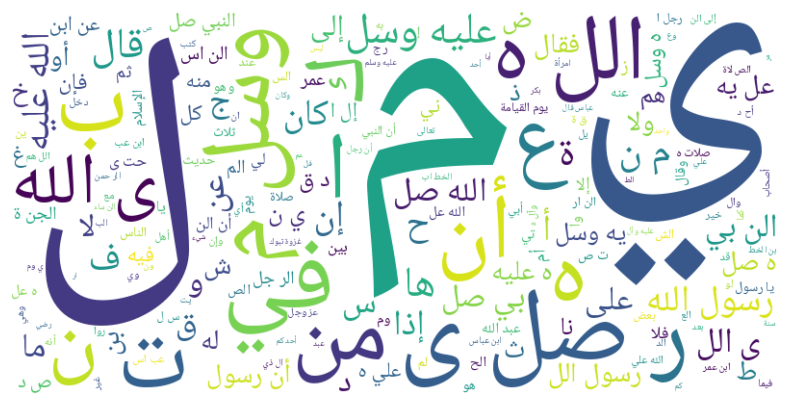

In [ ]:
text = ' '.join(df['Hadith'])

font_path = ImageFont.load_default()

# Generate the word cloud with the specified font
wordcloud = WordCloud(width=800, height=400, background_color='white',font_path='/content/NotoNaskhArabic-Regular.ttf').generate(text)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

We notice how there is alot of
- "الله"
- "الرسول صلى الله عليه وسلم"
- "قال الرسول"
- "عليه وسلم"
- "رسول الله"
- الجنة

which tells us about our data and makes sense since its Hadith

### Visualization of each label and its occurences

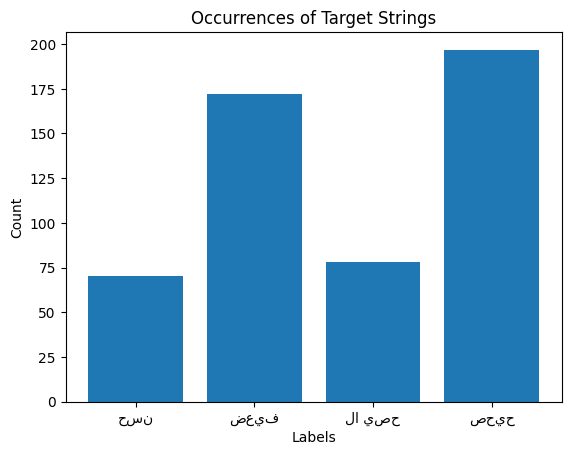

In [ ]:
# Create a bar plot
plt.bar(counts_dict.keys(), counts_dict.values())

# Customize the plot
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Occurrences of Target Strings')

# Display the plot
plt.show()

### Visualization of The frequency of each Hadith Speaker

We can notice that الألباني is the higher speaker

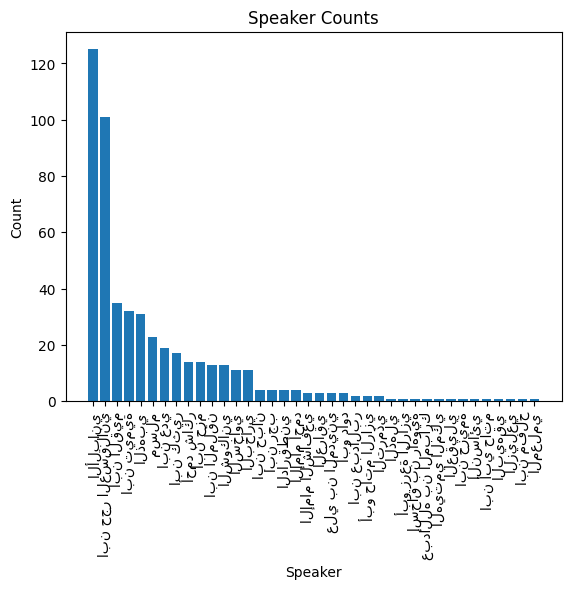

In [ ]:
# Count the occurrences of each speaker
speaker_counts = fdf['Speaker'].value_counts()

# Create a bar plot
plt.bar(speaker_counts.index, speaker_counts.values)

# Customize the plot
plt.xlabel('Speaker')
plt.ylabel('Count')
plt.title('Speaker Counts')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Display the plot
plt.show()

We visualize specific speaker "الألباني" and how his hadith labels frequency


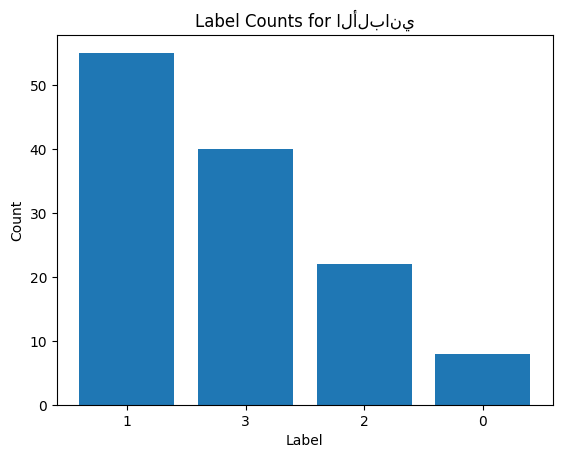

In [ ]:
# Filter the DataFrame for the speaker 'الألباني'
albani_df = fdf[fdf['Speaker'] == 'الألباني']

# Count the occurrences of each label for 'الألباني'
label_counts = albani_df['Labels'].value_counts()

# Convert the counts to integers
label_counts = label_counts.astype(int)

# Create a bar plot
plt.bar(label_counts.index.astype(str), label_counts.values)

# Customize the plot
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Counts for الألباني')

# Display the plot
plt.show()


In [ ]:
fdf['Source'].value_counts()

التعليقات الرضية         84
تغليق التعليق            39
تلخيص العلل المتناهية    31
صحيح مسلم                23
الكامل في الضعفاء        19
                         ..
البداية والنهاية          1
صحيح البخاري              1
منهاج السنة               1
السنن الكبرى للبيهقي      1
شفاء العليل               1
Name: Source, Length: 83, dtype: int64

Frequency and Distribution of our label classes we notice how 1 (weak hadiths are the most)


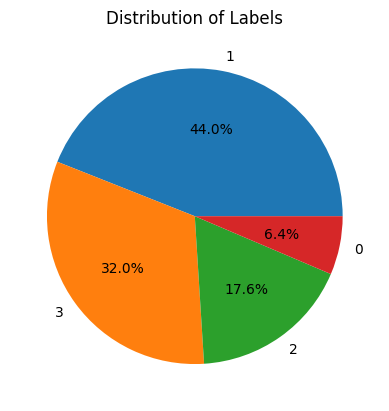

In [ ]:
# Pie Chart
plt.pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Labels')
plt.show()

Visualizing to see if there's specific sources are more frequent than each other of peak in our dataset in general

<ipython-input-53-eec80205740b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf['Source_Num'] = fdf['Source'].map(source_mapping)


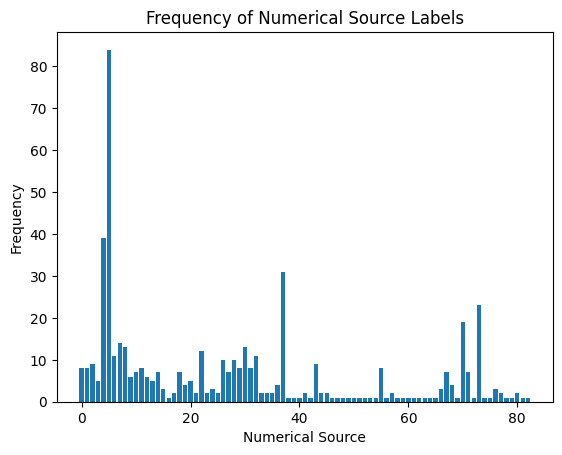

In [ ]:
# Convert source labels to numbers
source_labels = fdf['Source'].unique()
source_mapping = {label: i for i, label in enumerate(source_labels)}
fdf['Source_Num'] = fdf['Source'].map(source_mapping)

# Count the occurrences of each numerical source label
source_counts = fdf['Source_Num'].value_counts()

# Bar chart of numerical source labels
plt.bar(source_counts.index, source_counts.values)
plt.xlabel('Numerical Source')
plt.ylabel('Frequency')
plt.title('Frequency of Numerical Source Labels')
plt.show()

Correlation heatmap for labels and our different sources

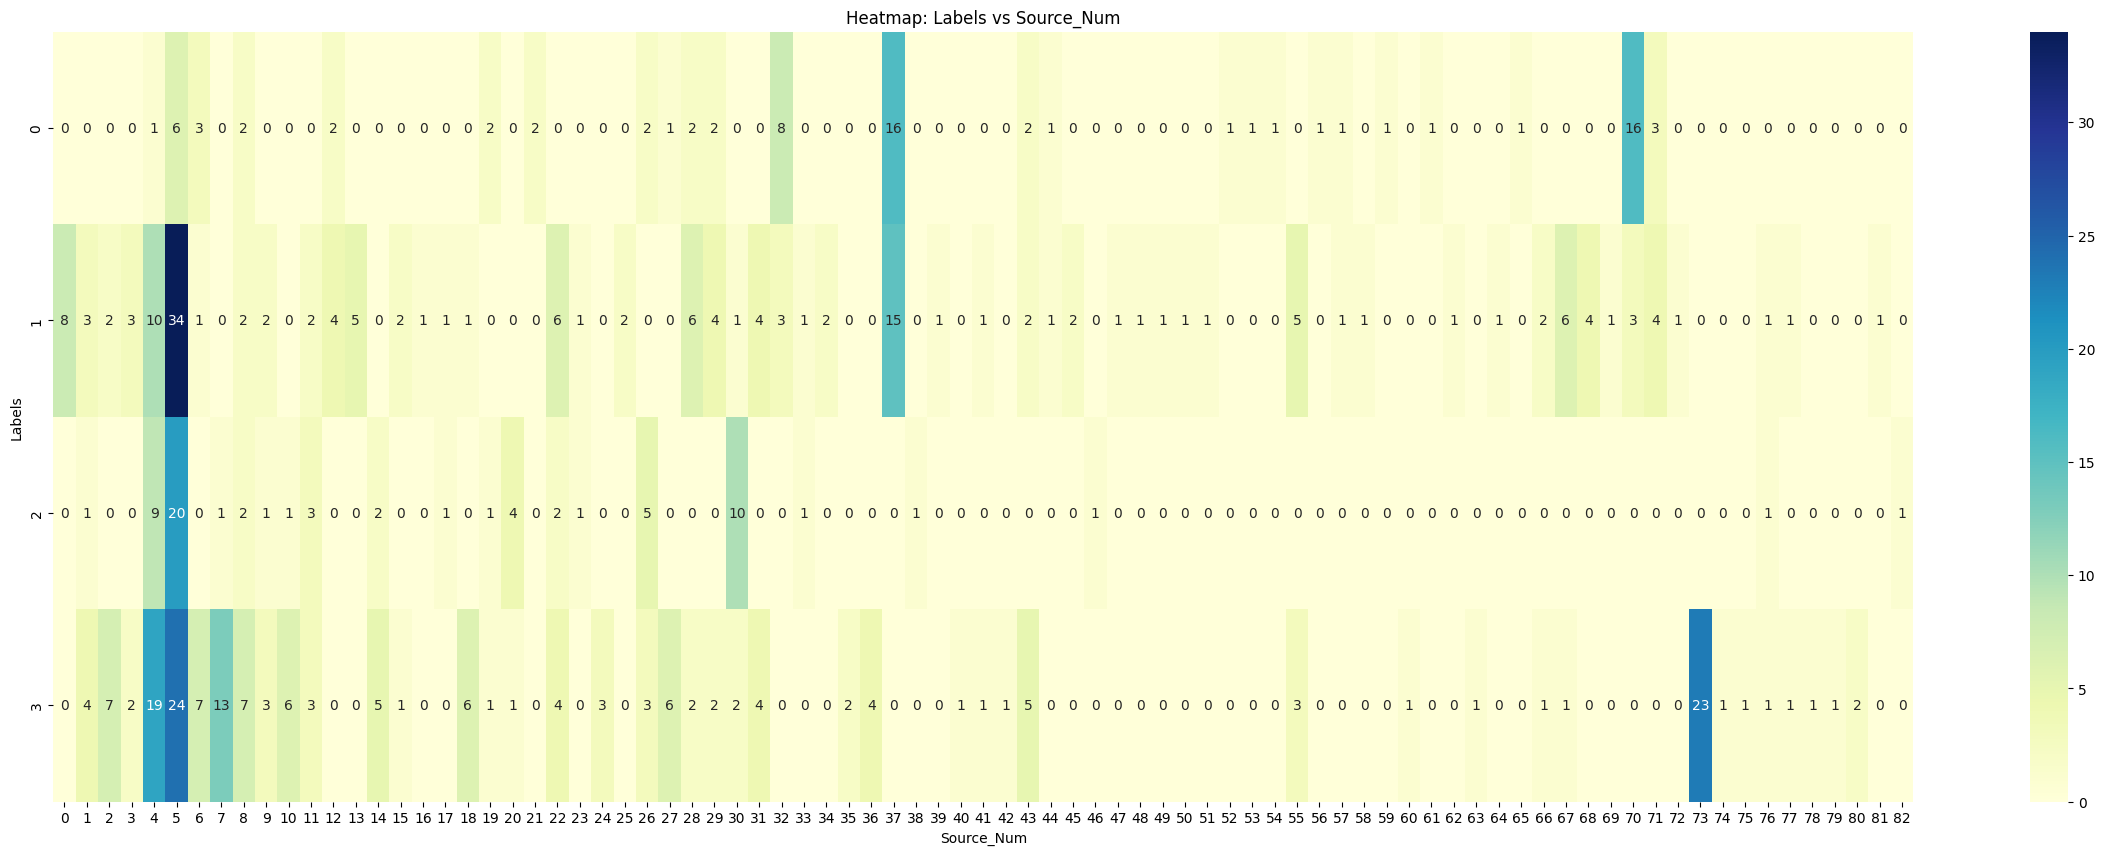

In [ ]:
# Create a pivot table of Labels and Source_Num
pivot_table = fdf.pivot_table(index='Labels', columns='Source_Num', aggfunc='size', fill_value=0)

# Create a heatmap
plt.figure(figsize=(30, 10))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d')
plt.xlabel('Source_Num')
plt.ylabel('Labels')
plt.title('Heatmap: Labels vs Source_Num')
plt.show()

# Model

In [13]:
df = pd.read_excel('preprocesseddata.xlsx')
df.to_csv('data.csv', index=False)
fdf = pd.read_csv('data.csv')
fdf

,Hadith,Narrator,Source,Speaker,Labels
0,ﺃﻥ ﺃﺑﻲ ﺑﻦ ﻛﻌﺐ ﺃﻣﻬﻢ ﻳﻌﻨﻲ ﻓﻲ ﺭﻣﻀﺎﻥ ﻭﻛﺎﻥ ﻳﻘﻨﺖ ﻓﻲ ...,بعض أصحاب محمد,ضعيف أبي داود,الألباني,1
1,ﺃﻧﻲ ﻳﻌﻨﻲ ﺳﻌﺮ ﺑﻦ ﺩﻳﺴﻢ ﻛﻨﺖ ﻓﻲ ﺷﻌﺐ ﻣﻦ ﻫﺬﻩ ﺍﻟﺸﻌﺎﺏ ...,مصدقا رسول الله,ضعيف أبي داود,الألباني,1
2,ﻋﻦ ﺃﺑﻲ ﺣﻤﺰﺓ ﺍﻟﺜﻤﺎﻟﻲ ﻗﺎﻝ ﻳﻌﻨﻲ ﺑﺎﻟﻨﺎﺱ ﻓﻲ ﻫﺬﻩ ﺍﻵﻳ...,أبو حمزة الثمالي,العجاب في بيان الأسباب,ابن حجر العسقلاني,1
3,ﺃﺧﺬ ﺍﺑﻦ ﻣﺴﻌﻮﺩ ﻗﻮﻣﺎ ﺍﺭﺗﺪﻭﺍ ﻋﻦ ﺍﻹﺳﻼﻡ ﻣﻦ ﺃﻫﻞ ﺍﻟﻌﺮ...,عبدالله بن عتبة,الصارم المسلول,ابن تيمية,3
4,ﺇﺫﺍ ﻣﺎﺕ ﺍﻟﻌﺒﺪ ﻭﷲ ﻋﺰ ﻭﺟﻞ ﻳﻌﻠﻢ ﻣﻨﻪ ﺷﺮﺍ ﻭﻗﺎﻝ ﺍﻟﻨﺎ...,عامر بن ربيعة,تسديد القوس,ابن حجر العسقلاني,1
...,...,...,...,...,...
501,ﻳﺎ ﺃﻳﻬﺎ ﺍﻟﻨﺎﺱ ﻣﻦ ﻋﻤﻞ ﻣﻨﻜﻢ ﻟﻨﺎ ﻋﻠﻰ ﻋﻤﻞ ﻓﻜﺘﻤﻨﺎ ...,عدي بن عميرة الكندي,صحيح أبي داود,الألباني,3
502,ﺑﻌﺜﻨﻲ ﺭﺳﻮﻝ ﷲ ﺻﻠﻰ ﷲ ﻋﻠﻴﻪ ﻭﺳﻠﻢ ﺇﻟﻰ ﺍﻟﻴﻤﻦ ﻗﺎﺿﻴﺎ ...,علي بن أبي طالب,صحيح أبي داود,الألباني,2
503,ﺃﻥ ﺍﻟﻨﺒﻲ ﺻﻠﻰ ﷲ ﻋﻠﻴﻪ ﻭﺁﻟﻪ ﻭﺳﻠﻢ ﺍﺟﺘﻠﻰ ﻋﺎﺋﺸﺔ ﻋﻨﺪ...,عبدالله بن عمر,الفوائد المجموعة,الشوكاني,1
504,ﺃﻭﻝ ﺣﺐ ﻓﻲ ﺍﻹﺳﻼﻡ ﺣﺐ ﺍﻟﻨﺒﻲ ﺻﻠﻰ ﷲ ﻋﻠﻴﻪ ﻭﺁﻟﻪ ﻭﺳﻠﻢ...,أنس بن مالك,الفوائد المجموعة,الشوكاني,1


In [14]:
fdf['Source'].value_counts()

التعليقات الرضية         84
تغليق التعليق            39
تلخيص العلل المتناهية    31
صحيح مسلم                23
الكامل في الضعفاء        19
                         ..
البداية والنهاية          1
صحيح البخاري              1
منهاج السنة               1
السنن الكبرى للبيهقي      1
شفاء العليل               1
Name: Source, Length: 83, dtype: int64

In [15]:
fdf['Speaker'].value_counts()

الألباني              125
ابن حجر العسقلاني     101
ابن القيم              35
ابن تيمية              32
الذهبي                 31
مسلم                   23
ابن عدي                19
ابن كثير               17
أحمد شاكر              14
ابن حزم                14
ابن الملقن             13
الشوكاني               13
السخاوي                11
البخاري                11
ابن حبان                4
ابن رجب                 4
الدارقطني               4
الإمام أحمد             4
الإمام الشافعي          3
العراقي                 3
علي بن المديني          3
أبو داود                3
ابن عبدالبر             2
أبو حاتم الرازي         2
الترمذي                 2
الذهلي                  1
أبو زرعة الرازي         1
إسحاق بن راهويه         1
عبدالله بن المبارك      1
الهيتمي المكي           1
العقيلي                 1
ابن خزيمة               1
النسائي                 1
ابن أبي حاتم            1
البيهقي                 1
الزيلعي                 1
ابن مفلح                1
المعلمي                 1
Name: Speake

In [16]:
fdf['Narrator'].value_counts()

أبو هريرة                              49
عبدالله بن عباس                        46
أنس بن مالك                            37
عبدالله بن عمر                         32
عائشة أم المؤمنين                      23
                                       ..
أبو هانئ                                1
عبدالرحمن بن الأسود وإبراهيم النخعي     1
علي بن أبي طالب ومعاذ بن جبل            1
تملك العبدرية                           1
يحيى بن أبي كثير                        1
Name: Narrator, Length: 150, dtype: int64

Data Transformation (Encoding Categorical features)

In [17]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Convert the text values in 'Source' column to numbers
fdf['Source'] = label_encoder.fit_transform(fdf['Source'])

# Check the updated 'Source' column
fdf['Source'].value_counts()

17    84
48    39
50    31
67    23
33    19
      ..
14     1
63     1
79     1
26     1
60     1
Name: Source, Length: 83, dtype: int64

In [18]:
# Convert the text values in 'Speaker' column to numbers
fdf['Speaker'] = label_encoder.fit_transform(fdf['Speaker'])

# Check the updated 'Speaker' column
fdf['Speaker'].value_counts()

18    125
10    101
6      35
8      32
25     31
37     23
15     19
16     17
3      14
11     14
7      13
29     13
28     11
21     11
9       4
13      4
24      4
19      4
20      3
30      3
36      3
1       3
14      2
0       2
23      2
26      1
2       1
4       1
35      1
34      1
31      1
12      1
33      1
5       1
22      1
27      1
17      1
32      1
Name: Speaker, dtype: int64

In [19]:
fdf

,Hadith,Narrator,Source,Speaker,Labels
0,ﺃﻥ ﺃﺑﻲ ﺑﻦ ﻛﻌﺐ ﺃﻣﻬﻢ ﻳﻌﻨﻲ ﻓﻲ ﺭﻣﻀﺎﻥ ﻭﻛﺎﻥ ﻳﻘﻨﺖ ﻓﻲ ...,بعض أصحاب محمد,68,18,1
1,ﺃﻧﻲ ﻳﻌﻨﻲ ﺳﻌﺮ ﺑﻦ ﺩﻳﺴﻢ ﻛﻨﺖ ﻓﻲ ﺷﻌﺐ ﻣﻦ ﻫﺬﻩ ﺍﻟﺸﻌﺎﺏ ...,مصدقا رسول الله,68,18,1
2,ﻋﻦ ﺃﺑﻲ ﺣﻤﺰﺓ ﺍﻟﺜﻤﺎﻟﻲ ﻗﺎﻝ ﻳﻌﻨﻲ ﺑﺎﻟﻨﺎﺱ ﻓﻲ ﻫﺬﻩ ﺍﻵﻳ...,أبو حمزة الثمالي,28,10,1
3,ﺃﺧﺬ ﺍﺑﻦ ﻣﺴﻌﻮﺩ ﻗﻮﻣﺎ ﺍﺭﺗﺪﻭﺍ ﻋﻦ ﺍﻹﺳﻼﻡ ﻣﻦ ﺃﻫﻞ ﺍﻟﻌﺮ...,عبدالله بن عتبة,27,8,3
4,ﺇﺫﺍ ﻣﺎﺕ ﺍﻟﻌﺒﺪ ﻭﷲ ﻋﺰ ﻭﺟﻞ ﻳﻌﻠﻢ ﻣﻨﻪ ﺷﺮﺍ ﻭﻗﺎﻝ ﺍﻟﻨﺎ...,عامر بن ربيعة,47,10,1
...,...,...,...,...,...
501,ﻳﺎ ﺃﻳﻬﺎ ﺍﻟﻨﺎﺱ ﻣﻦ ﻋﻤﻞ ﻣﻨﻜﻢ ﻟﻨﺎ ﻋﻠﻰ ﻋﻤﻞ ﻓﻜﺘﻤﻨﺎ ...,عدي بن عميرة الكندي,61,18,3
502,ﺑﻌﺜﻨﻲ ﺭﺳﻮﻝ ﷲ ﺻﻠﻰ ﷲ ﻋﻠﻴﻪ ﻭﺳﻠﻢ ﺇﻟﻰ ﺍﻟﻴﻤﻦ ﻗﺎﺿﻴﺎ ...,علي بن أبي طالب,61,18,2
503,ﺃﻥ ﺍﻟﻨﺒﻲ ﺻﻠﻰ ﷲ ﻋﻠﻴﻪ ﻭﺁﻟﻪ ﻭﺳﻠﻢ ﺍﺟﺘﻠﻰ ﻋﺎﺋﺸﺔ ﻋﻨﺪ...,عبدالله بن عمر,31,29,1
504,ﺃﻭﻝ ﺣﺐ ﻓﻲ ﺍﻹﺳﻼﻡ ﺣﺐ ﺍﻟﻨﺒﻲ ﺻﻠﻰ ﷲ ﻋﻠﻴﻪ ﻭﺁﻟﻪ ﻭﺳﻠﻢ...,أنس بن مالك,31,29,1


### Splitting the Data

In [20]:
# Splitting the data into features (X) and target variable (y)
X_text = fdf['Hadith']  # Text feature
X_source = fdf['Source']  # Source feature
X_speaker = fdf['Speaker']  # Speaker feature
y = fdf['Labels']  # Target variable

# Convert text to numerical representations
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_text)
X_sequences = tokenizer.texts_to_sequences(X_text)
X_padded = pad_sequences(X_sequences)

# Combine all features into a single matrix
X_combined = np.column_stack((X_padded, X_source, X_speaker))

X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=44)

### Decision Tree Classifier  

In [31]:
# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=44)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
yd_pred = dt_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, yd_pred)
print("Accuracy: %.2f" % accuracy)

Accuracy: 0.54


Evaluating Decision Tree classifier by Confusion Matrix

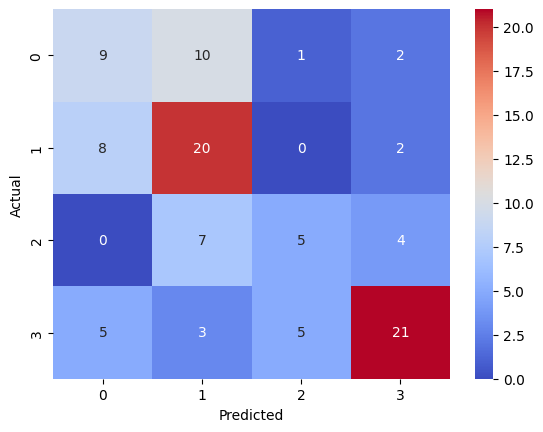

In [35]:
# Generate confusion matrix
cm = confusion_matrix(y_test, yd_pred)

# Create a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Random Forest Classifier

In [22]:
# Create a Random Forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=44)

# Train the classifier on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f" % accuracy)

Accuracy: 0.59


Random forest confusion matrix


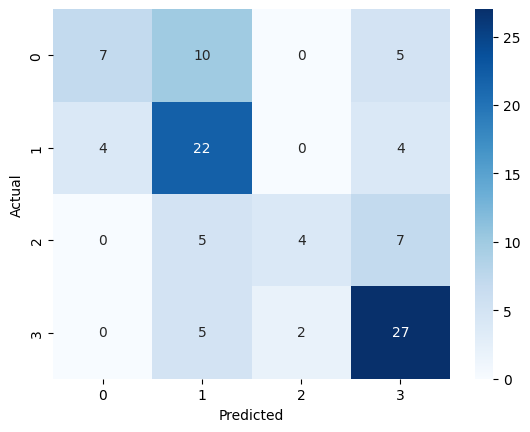

In [23]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [24]:
# Select random instances from the test set
num_samples = 10
random_indices = np.random.choice(len(X_test), num_samples, replace=False)
X_samples = X_test[random_indices]
y_true_samples = np.array(y_test)[random_indices]
y_pred_samples = y_pred[random_indices]

# Convert numerical representations back to text
reverse_word_index = {index: word for word, index in tokenizer.word_index.items()}
X_text_samples = [' '.join([reverse_word_index.get(index, '') for index in x]) for x in X_samples]

# Display the samples and predictions
for i in range(num_samples):
    print('Text:', X_text_samples[i])
    print('True Label:', y_true_samples[i])
    print('Predicted Label:', y_pred_samples[i])
    print('---')

Text:            ﺇﺫﺍ ﺫﺑﺢ ﺃﺣﺪﻛﻢ ﻓﻠﻴﺠﻬﺰ ﺇﻟﻰ ﺍﺑﻦ
True Label: 1
Predicted Label: 0
---
Text:    ﺇﻥ ﺍﻟﺤﺒﺸﺔ ﺃﻧﺠﺪﺍﺀ ﺃﺳﺨﻴﺎﺀ ﻭﺇﻥ ﻓﻴﻬﻢ ﻟﻴﻤﻨﺎ ﻓﺎﺗﺨﺬﻭﻫﻢ ﻭﺍﻣﺘﻬﻨﻮﻫﻢ ﻓﺈﻧﻬﻢ ﺃﻗﻮﻯ ﺷﻲﺀ ﻣﻨﻪ ﺇﺫﺍ
True Label: 0
Predicted Label: 0
---
Text: ﺃﻥ ﺍﻟﻨﺒﻲ ﺻﻠﻰ ﷲ ﻋﻠﻴﻪ ﻭﺳﻠﻢ ﻛﺎﻥ ﺇﺫﺍ ﻟﻢ ﻳﺼﻞ ﺃﺭﺑﻌﺎ ﻗﺒﻞ ﺍﻟﻈﻬﺮ ﺻﻼﻫﻦ ﺑﻌﺪﻩ ﺑﻴﻦ ﻋﻠﻴﻪ
True Label: 3
Predicted Label: 3
---
Text:     ﺍﻟﻠﻬﻢ ﻫﺬﺍ ﻗﺴﻤﻲ ﻓﻴﻤﺎ ﺃﻣﻠﻚ ﻓﻼ ﺗﻠﻤﻨﻲ ﻓﻴﻤﺎ ﺗﻤﻠﻚ ﻭﻻ ﺃﻣﻠﻚ ﺍﺑﻦ ﻣﻨﻪ
True Label: 0
Predicted Label: 3
---
Text: ﺇﻥ ﺻﻼﺓ ﺍﻟﺮﺟﻞ ﻣﻊ ﺍﻟﺮﺟﻞ ﺃﺯﻛﻰ ﻣﻦ ﺻﻼﺗﻪ ﻭﺣﺪﻩ ﻭﺻﻼﺗﻪ ﻣﻊ ﺍﻟﺮﺟﻠﻴﻦ ﺃﺯﻛﻰ ﻣﻦ ﺻﻼﺗﻪ ﻓﻴﻪ ﻋﺒﺎﺱ
True Label: 1
Predicted Label: 3
---
Text: ﻛﻔﻰ ﺑﺎﻟﻤﺮﺀ ﺇﺛﻤﺎ ﺃﻥ ﻳﺸﺎﺭ ﺇﻟﻴﻪ ﺑﺎﻷﺻﺎﺑﻊ ﻗﺎﻟﻮﺍ ﻳﺎ ﺭﺳﻮﻝ ﷲ ﻭﺇﻥ ﻛﺎﻥ ﺧﻴﺮﺍ ﻗﺎﻝ ﻟﻢ ﺍﻟﻨﺎﺱ
True Label: 1
Predicted Label: 1
---
Text: ﺇﻥ ﺭﺳﻮﻝ ﷲ ﺻﻠﻰ ﷲ ﻋﻠﻴﻪ ﻭﺳﻠﻢ ﻗﺎﻝ ﻓﻲ ﻣﺮﺿﻪ ﺍﻟﺬﻱ ﻗﺒﺾ ﻓﻴﻪ ﻟﻔﺎﻃﻤﺔ ﺇﻥ  ﻋﻦ
True Label: 2
Predicted Label: 3
---
Text: ﻋﻦ ﺍﻟﺼﺒﻲ ﺑﻦ ﻣﻌﺒﺪ ﻗﺎﻝ ﻛﻨﺖ ﺭﺟﻼ ﻧﺼﺮﺍﻧﻴﺎ ﻓﺄﺳﻠﻤﺖ ﻓﺄﻫﻠﻠﺖ ﺑﺎﻟﺤﺞ ﻭﺍﻟﻌﻤﺮﺓ ﻓﺴﻤﻌﻨﻲ ﺳﻠﻤﺎﻥ ﺑﻦ ﺻﻼﺗﻪ ﻭﻻ
True Label: 3
Predicted Label: 3
---
Text:           ﺃﺑﻐﺾ ﺍﻟﺤﻼﻝ ﺇﻟﻰ ﷲ ﺍﻟﻄﻼﻕ ﺇﻟﻰ ﺍﺑﻦ
True Label: 3
Predicted Label: 1
-

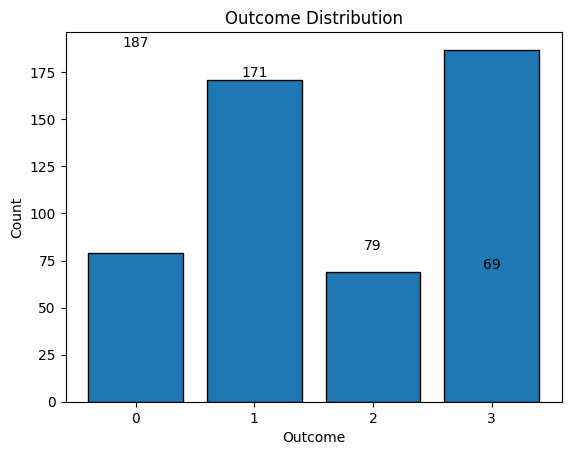

In [25]:
Outcome_counts = fdf['Labels'].value_counts()

plt.bar(Outcome_counts.index, Outcome_counts.values, edgecolor='black')

# Add annotations to the bars
for i, count in enumerate(Outcome_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xticks(Outcome_counts.index.tolist())
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Outcome Distribution')
plt.show()

# oversampling

In [26]:
# Perform oversampling
oversampler = RandomOverSampler(random_state=44)
X_oversampled, y_oversampled = oversampler.fit_resample(X_combined, y)

Xo_train, Xo_test, yo_train, yo_test = train_test_split(X_oversampled, y_oversampled, test_size=0.2, random_state=44)

### Decision Tree Classifier

In [36]:
# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=44)

# Train the classifier
dt_classifier.fit(Xo_train, yo_train)

# Make predictions on the test set
y_pred1 = dt_classifier.predict(Xo_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(yo_test, y_pred1)
print("Accuracy: %.2f" % accuracy)

Accuracy: 0.79


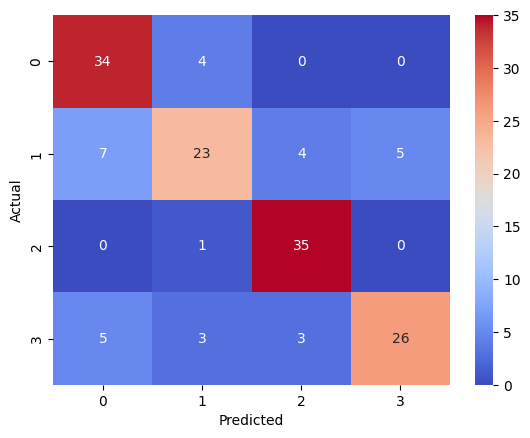

In [38]:
# Generate confusion matrix
cm = confusion_matrix(yo_test, y_pred1)

# Create a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Random Forest Classifier

In [28]:
# Create a Random Forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=44)

# Train the classifier on the training data
rf.fit(Xo_train, yo_train)

# Make predictions on the test data
y_pred = rf.predict(Xo_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(yo_test, y_pred)
print("Accuracy: %.2f" % accuracy)

Accuracy: 0.81


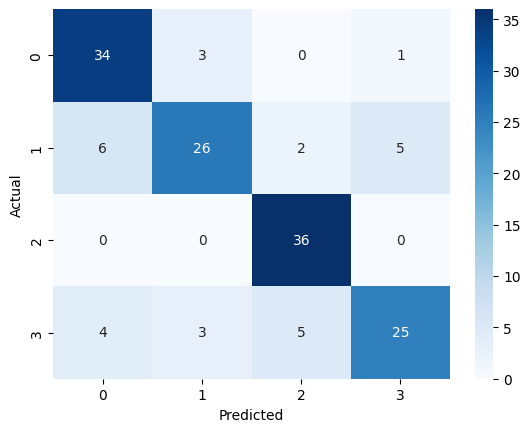

In [29]:
# Generate confusion matrix
cm = confusion_matrix(yo_test, y_pred)

# Create a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()